In [28]:
from mailcap import subst

import numpy  as np
import pandas as pd
import missingno as msno

# 缺失值处理

In [3]:
# 在 pandas 中,缺失值用 NaN  nan  NAN 表示, 其他的 falsy 值不能代表空

In [11]:
# 判断某个值是是否为空 notnull() 和 notna()

print(pd.notna(np.nan))
print(pd.notnull(np.nan))

print(pd.isnull(10))
print(pd.notnull(10))

False
False
False
True


In [20]:
# 1. 加载数据,包括缺失值
# pd.read_csv("data/survey_visited.csv")

# 2. 加载数据时,忽略缺失值,用 '' 填充
pd.read_csv('data/survey_visited.csv',keep_default_na=False) # keep_default_na 是否加载缺失值

# 3. 加载数据时,手动指定某些值为空值
pd.read_csv("data/survey_visited.csv",keep_default_na=False,na_values=["619"])

,ident,site,dated
0,NaN,DR-1,1927-02-08
1,622.0,DR-1,1927-02-10
2,734.0,DR-3,1939-01-07
3,735.0,DR-3,1930-01-12
4,751.0,DR-3,1930-02-26
5,752.0,DR-3,
6,837.0,MSK-4,1932-01-14
7,844.0,DR-1,1932-03-22


## 3. 如何处理缺失值

### 3.1 加载数据源及缺失值的可视化

In [21]:
# 1. 加载数据
df = pd.read_csv("data/titanic_train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [22]:
# 3. 查看是否获救数据
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: >

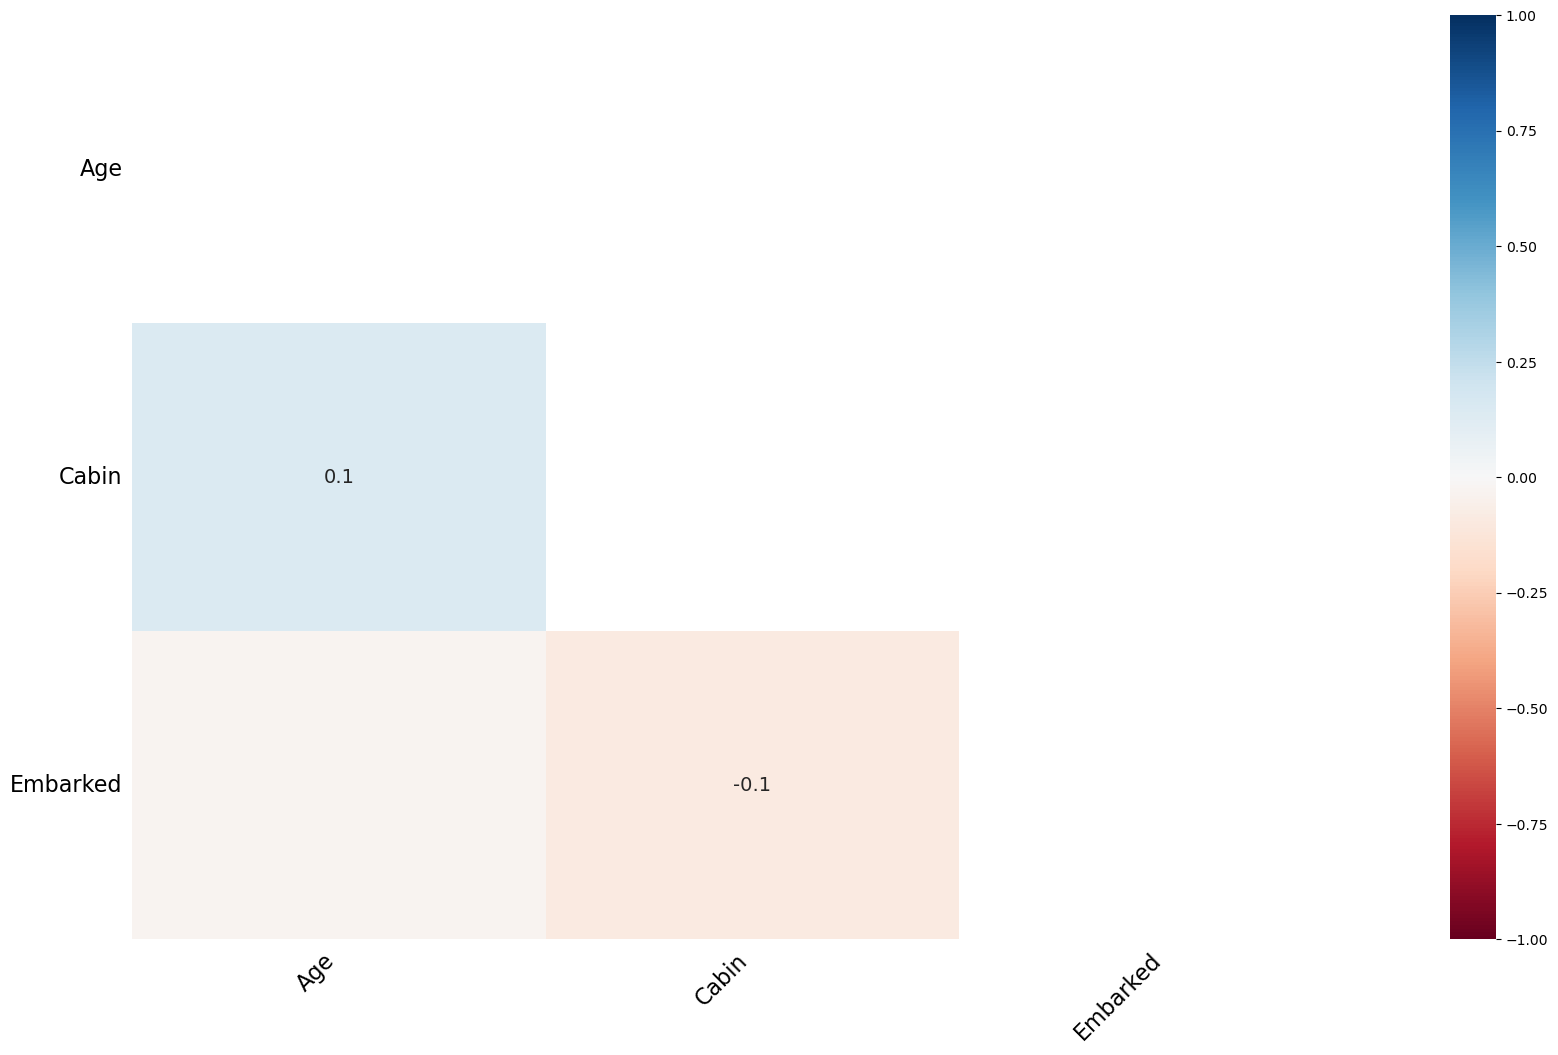

In [31]:
# 4. 查看缺失值的分布情况,和关联性
# 如果电脑没有安装 missingno 需要安装
# 绘制柱状图
# msno.bar(df)
msno.heatmap(df)

## 3.2 缺失值处理方式：1.删除缺失值


In [36]:
# 1. 查看各列空值数据统计情况
df.isnull().sum()

# 2. 删除缺失值
"""
    参数解释
        axis=0 默认 代表行
        how=  any任意一个为空  all 都要为空
"""
df.dropna(how="any",subset=['Age'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### 3.3 缺失值处理方式: 非时间序列数据

In [54]:
df.isnull().sum()

# 2. fillna() 函数,实现填充缺失值
# df.fillna(0).isnull().sum()

# 3. 实际开发中,会用到 平均值 中位数 标准差 最大值 最小值等来填充
# 需求 针对 Age 列的数据,使用 Age 列的平均值来填充
df['Age'] = df.Age.fillna(df.Age.mean())

# 4. 填充后查看统计信息
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 3.4 缺失值处理方式3 --- 线性填充

In [73]:
# 1. 获取源数据,获取 df 对象
city_day = pd.read_csv("data/city_day.csv",parse_dates=["Date"],index_col="Date")
city_day

# 2. 获取有控制的某一段数据
city_day['Xylene'][50:64]

# 思路 1: 用 空值的上个值来填充
city_day['Xylene'].ffill()[50:64]
city_day['Xylene'].bfill()[50:64]

# 思路3: 线性填充 结合 前边和后变的值,来推导出1个要填充的值
# limit_direction参数有三个值   both:参考前边+后边数据,推出值  forward: 只参考前边的值   backward 只参考后边的值
city_day['Xylene'].interpolate(limit_direction='both')[50:64]

Date
2015-02-20     7.4800
2015-02-21    15.4400
2015-02-22     8.4700
2015-02-23    28.4600
2015-02-24     6.0500
2015-02-25     0.8100
2015-02-26     0.9375
2015-02-27     1.0650
2015-02-28     1.1925
2015-03-01     1.3200
2015-03-02     0.2200
2015-03-03     2.2500
2015-03-04     1.5500
2015-03-05     4.1300
Name: Xylene, dtype: float64